# Neue Konzepte (KI): Erkennung von Phishing Websites mit Deep Learning (NN)

## 1. Business Understanding

### Motivation \& Businesskontext

- **Globale Bedrohung:**
Phishing zählt zu den häufigsten Cyberbedrohungen weltweit und verursacht jährlich Milliardenschäden.
- **Täuschend echt:**
Täuschend echte Webseiten führen zu massiven Daten- und Finanzverlusten bei Privatpersonen und Unternehmen.
- **Wirtschaftliche Relevanz:**
Schutz sensibler Kundendaten und Online-Zahlungen ist essenziell für Vertrauen und Geschäftserfolg.

### Business Understanding

- **Reales Sicherheitsproblem:**
Phishing-Erkennung adressiert ein akutes wirtschaftliches Sicherheitsproblem mit hoher gesellschaftlicher Relevanz.
- **Wirtschaftlicher Schaden:**
Unternehmen verlieren durch erfolgreiche Phishing-Angriffe Geld, Reputation und das Vertrauen ihrer Kunden.
- **KI als Lösung:**
Künstliche Intelligenz kann Schutzsysteme (Browser, E-Mail-Filter, Sicherheitssoftware) verbessern und Bedrohungen proaktiv verhindern.


## 2. Data Understanding

### Datensatz
- Datensatz umfasst Merkmale von Phishing und legitimen Webseiten; Zielvariable: 1 = Phishing, 0 = Legit.
- Unterscheidungskriterien sind Merkmale der URL und technische Eigenschaften.

### Merkmale
- URL-Merkmale: Länge und Komplexität, IP-Adresse statt Domain, Sonderzeichen/Subdomains, verdächtige Keywords wie „login“, „verify“, „secure“.
- Technische Merkmale: Existenz von SSL-Zertifikaten, Domain-Alter, HTML-Struktur, Redirect-Chains, externe Links.

In [1]:
import numpy as np 
import pandas as pd 

In [2]:
data=pd.read_csv('dataset.csv')
data.head()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Target
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,0
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,0
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,0
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,0
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


## 3. Data Preparation

- **Datenbereinigung**  
  Fehlende Werte wurden identifiziert und mit passenden Methoden wie Median oder Modus ersetzt.
- **Feature Engineering**  
  Kategorische Merkmale wurden in numerische umgewandelt (z. B. One-Hot-Encoding, Label-Encoding).
- **Normalisierung**  
  Numerische Merkmale wurden mittels StandardScaler normalisiert, um das Training zu stabilisieren.
- **Train-Test-Split**  
  Die Daten wurden in 75 % Trainings- und 25 % Testdaten für unabhängige Evaluation aufgeteilt.


In [3]:
from sklearn.model_selection import train_test_split
X = data.copy()

y = X.pop('Target')

X = data.drop(columns=['index','Target'])

X_train, X_valid, y_train, y_valid = \
    train_test_split(X, y, stratify=y, train_size=0.75)

input_shape = [X_train.shape[1]]
print("Input shape is ", input_shape)
X.head()

Input shape is  [30]


,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,1,-1,-1,-1,-1,1,1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,1,-1,-1,0,-1,1,1,1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,1,-1,1,-1,1,0,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,1,-1,-1,1,-1,1,-1,1
4,1,0,-1,1,1,-1,1,1,-1,1,...,1,-1,1,-1,-1,0,-1,1,1,1


## 4. Modeling

**Deep Neural Network Architektur**

- Stack aus Layers mit Keras Sequential API
- Input: Batch Normalization für stabile Eingaben
- 2 Hidden Layers mit je 512 Neuronen, ReLU-Aktivierung
- Nach jedem Hidden Layer: Batch Normalization & Dropout (0.3) zur Overfitting-Prävention
- Output: 1 Neuron mit Sigmoid für binäre Klassifikation


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid'),
])

In [5]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy',keras.metrics.Precision(),keras.metrics.Recall()], 
)

In [6]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=20,
    min_delta=0.01,
    restore_best_weights=True,
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=200,
    callbacks=[early_stopping],
)

Epoch 1/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - binary_accuracy: 0.8837 - loss: 0.3032 - precision: 0.9065 - recall: 0.8822 - val_binary_accuracy: 0.9226 - val_loss: 0.3445 - val_precision: 0.8969 - val_recall: 0.9727
Epoch 2/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - binary_accuracy: 0.9308 - loss: 0.1791 - precision: 0.9339 - recall: 0.9424 - val_binary_accuracy: 0.8889 - val_loss: 0.3590 - val_precision: 0.8392 - val_recall: 0.9903
Epoch 3/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - binary_accuracy: 0.9430 - loss: 0.1401 - precision: 0.9435 - recall: 0.9547 - val_binary_accuracy: 0.8853 - val_loss: 0.3466 - val_precision: 0.8335 - val_recall: 0.9922
Epoch 4/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - binary_accuracy: 0.9438 - loss: 0.1343 - precision: 0.9468 - recall: 0.9526 - val_binary_accuracy: 0.8987 - val_loss: 0.3126 - val_precision: 0.8499 - val_recall: 0.9935
Epoch 5/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - binary_accuracy: 0.9456 - loss: 0.1235 - precision

## 5. Evaluation

Best Validation Loss: 0.078115
Best Validation Accuracy: 0.9700
Best Precision: 0.9673
Best Recall: 0.9935

Verfügbare Spalten: ['binary_accuracy', 'loss', 'precision', 'recall', 'val_binary_accuracy', 'val_loss', 'val_precision', 'val_recall']


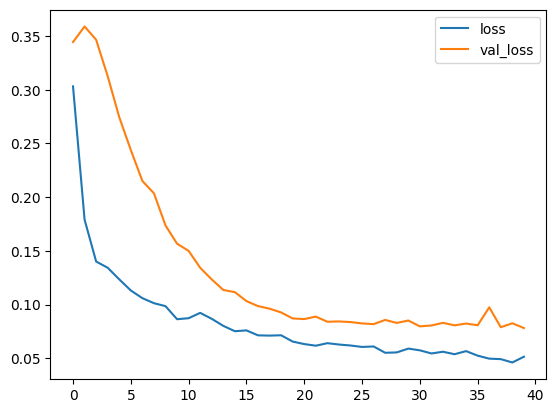

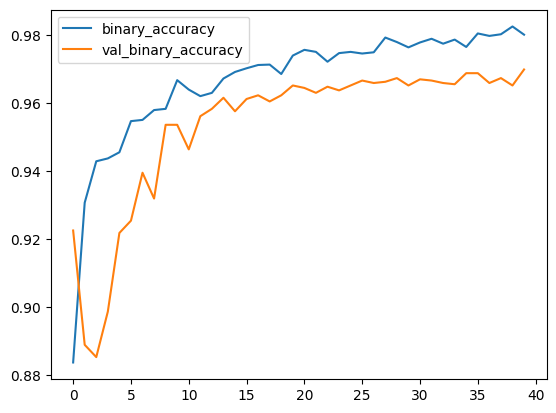

In [7]:
history_df = pd.DataFrame(history.history)

# Robuste Spaltenerkennung - funktioniert unabhängig von _1, _2, etc. Suffixen
def find_column(pattern):
    """Findet Spalte die mit pattern beginnt"""
    for col in history_df.columns:
        if col.startswith(pattern):
            return col
    return None

# Finde die richtigen Spaltennamen automatisch
precision_col = find_column('val_precision')
recall_col = find_column('val_recall')

# Plot Loss und Accuracy
history_df.loc[0:, ['loss', 'val_loss']].plot()
history_df.loc[0:, ['binary_accuracy', 'val_binary_accuracy']].plot()

# Zeige beste Metriken
print(f"Best Validation Loss: {history_df['val_loss'].min():.6f}")
print(f"Best Validation Accuracy: {history_df['val_binary_accuracy'].max():.4f}")

if precision_col:
    print(f"Best Precision: {history_df[precision_col].max():.4f}")
else:
    print("Precision Spalte nicht gefunden")
    
if recall_col:
    print(f"Best Recall: {history_df[recall_col].max():.4f}")
else:
    print("Recall Spalte nicht gefunden")

print(f"\nVerfügbare Spalten: {list(history_df.columns)}")

### Modellbewertung anhand verschiedener Metriken

Validierungsgenauigkeit: 0.9653
Precision: 0.9604
Recall: 0.9779


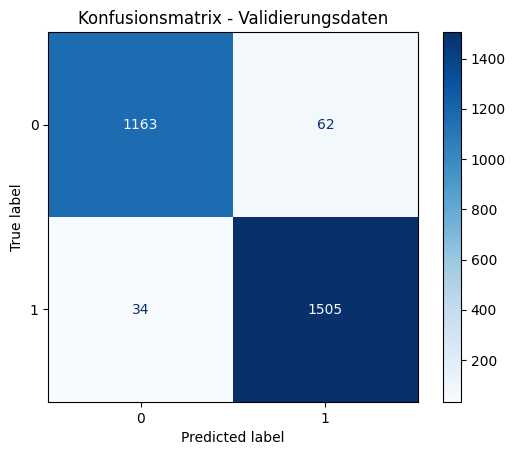

In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score, precision_score, recall_score
from sklearn.metrics import ConfusionMatrixDisplay

# Vorhersagen für Validierungsdaten
y_pred_proba = model.predict(X_valid, verbose=0)
y_pred = (y_pred_proba > 0.5).astype(int).flatten()
y_true = y_valid.values

# (1) Klassifikationsmetriken
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, zero_division=1)
recall = recall_score(y_true, y_pred, zero_division=1)
print(f'Validierungsgenauigkeit: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')

# (2) Confusion Matrix
disp = ConfusionMatrixDisplay.from_predictions(y_true, y_pred, cmap='Blues')
plt.title("Konfusionsmatrix - Validierungsdaten")
plt.show()